In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [2]:
# load the data

data = np.load('training_data/training_data_arg3.npz', allow_pickle=True)


train_set = data['train_set']
test_set = data['test_set']
val_set = data['val_set']

train_set = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in train_set]
val_set = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in val_set]
test_set = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in test_set]

train_set = train_set + val_set

print(len(train_set))

44290


In [3]:
# load the data

data = np.load('training_data/training_data.npz', allow_pickle=True)

train_set2 = data['train_set']
val_set2 = data['val_set']

train_set2 = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in train_set2]
val_set2 = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in val_set2]

train_set2 = train_set2 + val_set2

len(train_set2)

135

In [4]:
# lightgbm

import lightgbm as lgb

model = lgb.LGBMClassifier(objective='multiclass')
model.fit([x['x'] for x in train_set], [x['y'] for x in train_set])
y_pred = model.predict([x['x'] for x in test_set], [x['y'] for x in test_set])

print('Accuracy of lightgbm classifier on test set: {:.2f}'.format(model.score([x['x'] for x in test_set], [x['y'] for x in test_set])))

Accuracy of lightgbm classifier on test set: 0.87


In [5]:
# lightgbm

import lightgbm as lgb

model0 = lgb.LGBMClassifier(objective='multiclass')
model0.fit([x['x'] for x in train_set2], [x['y'] for x in train_set2])
y_pred = model0.predict([x['x'] for x in test_set], [x['y'] for x in test_set])

print('Accuracy of lightgbm classifier on test set: {:.2f}'.format(model0.score([x['x'] for x in test_set], [x['y'] for x in test_set])))

Accuracy of lightgbm classifier on test set: 0.83


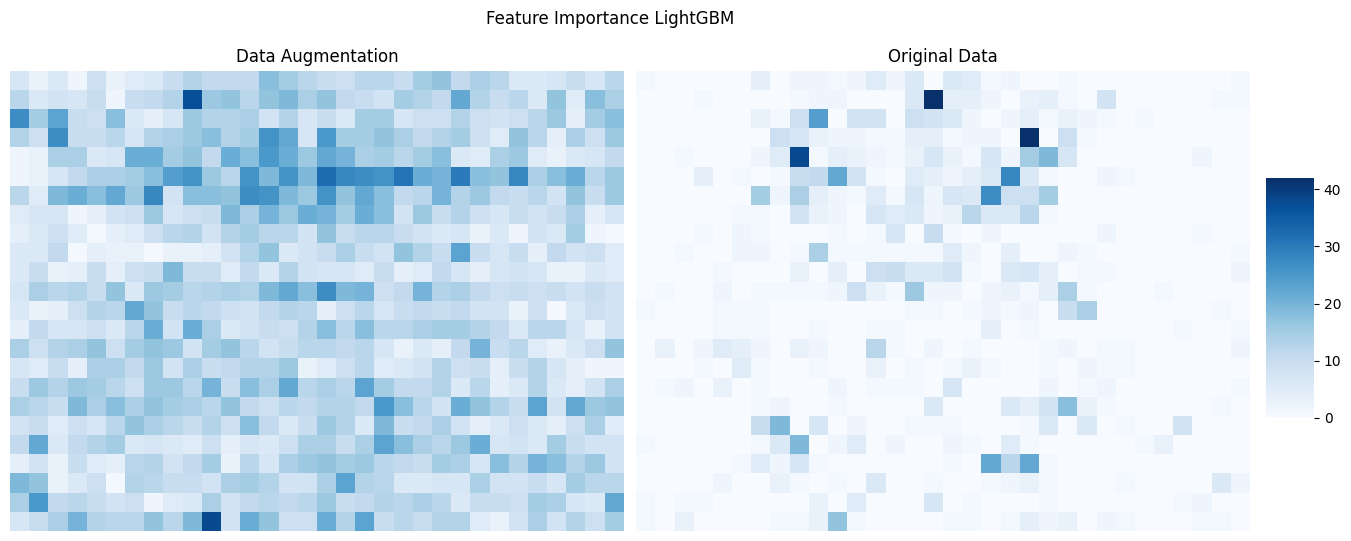

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot feature importance
importances1 = model.feature_importances_
importances1 = importances1.reshape(24,32)

importances2 = model0.feature_importances_
importances2 = importances2.reshape(24,32)

# Calculate global min and max
vmin = min(importances1.min(), importances2.min())
vmax = max(importances1.max(), importances2.max())

fig, axs = plt.subplots(1, 2, figsize=(16, 6), 
                        sharey=True, # share y-axis
                        gridspec_kw={'wspace': 0.02}) # minimal space between subplots

cbar_ax = fig.add_axes([.91, .3, .03, .4]) # position of the colorbar

sns.heatmap(importances1, cmap='Blues', annot=False, fmt='.2f', 
            xticklabels=False, yticklabels=False, 
            vmin=vmin, vmax=vmax, square=True, 
            ax=axs[0], cbar=False)

sns.heatmap(importances2, cmap='Blues', annot=False, fmt='.2f', 
            xticklabels=False, yticklabels=False, 
            vmin=vmin, vmax=vmax, square=True, 
            ax=axs[1], cbar_ax=cbar_ax)

axs[0].set_title('Data Augmentation')
axs[1].set_title('Original Data')

fig.suptitle('Feature Importance LightGBM') # general title
plt.show()

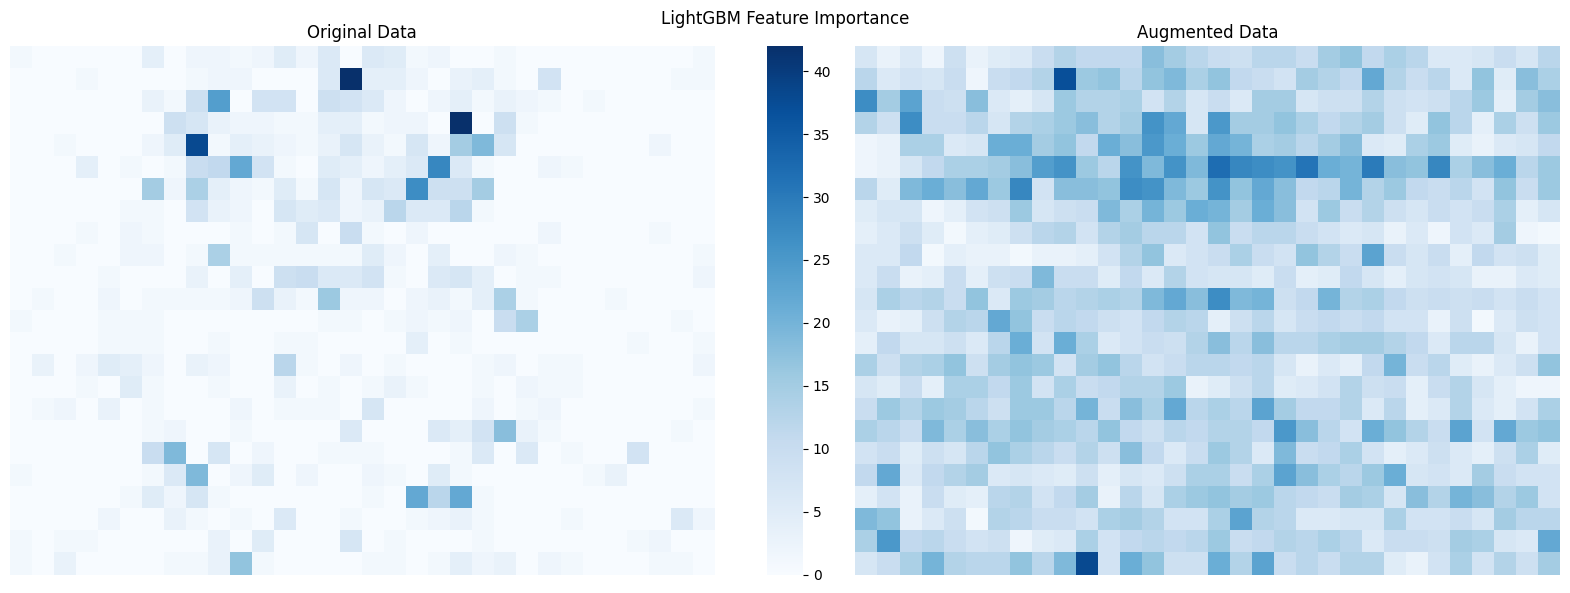

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot feature importance
importances1 = model.feature_importances_
importances1 = importances1.reshape(24,32)

importances2 = model0.feature_importances_
importances2 = importances2.reshape(24,32)

# Calculate global min and max
vmin = min(importances1.min(), importances2.min())
vmax = max(importances1.max(), importances2.max())

fig, (ax1, cax, ax2) = plt.subplots(1, 3, figsize=(16, 6), 
                                    gridspec_kw={"width_ratios":[1,0.05,1]})

sns.heatmap(importances1, cmap='Blues', annot=False, fmt='.2f', 
            xticklabels=False, yticklabels=False, 
            vmin=vmin, vmax=vmax, square=True, 
            ax=ax2, cbar_ax=cax)

sns.heatmap(importances2, cmap='Blues', annot=False, fmt='.2f', 
            xticklabels=False, yticklabels=False, 
            vmin=vmin, vmax=vmax, square=True, 
            ax=ax1, cbar=False)

ax1.set_title('Original Data')
ax2.set_title('Augmented Data')

fig.suptitle('LightGBM Feature Importance') # general title
plt.tight_layout()
plt.show()

In [8]:
np.sum(importances1)

9000

In [32]:
# load the data

data = np.load('training_data/training_data_arg3.npz', allow_pickle=True)


train_set = data['train_set']
test_set = data['test_set']
val_set = data['val_set']

train_set = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in train_set]
val_set = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in val_set]
test_set = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in test_set]

train_set = np.array(train_set)
val_set = np.array(val_set)

print(len(train_set))

2379


In [46]:
eval_set_x = np.array([x['x'] for x in val_set])

eval_set_y = np.array([x['y'] for x in val_set])

In [47]:
print(eval_set_x.shape)

print(eval_set_y.shape)

(666, 768)
(666,)


In [53]:
import lightgbm as lgb

p= {
    'boosting_type': 'gbdt', # Tipo de algoritmo de boosting
    'num_leaves': 500,        # Número de folhas na árvore
    'max_depth': -1,         # Profundidade máxima da árvore, -1 significa sem limite
    'learning_rate': 0.001,    # Taxa de aprendizado
    'n_estimators': 500,     # Número de árvores de boosting a serem criadas
    'objective': 'multiclass', # Objetivo do modelo
    'random_state': 0,       # Semente para resultados reprodutíveis
    'verbose':1,
    'num_class': 3,
    'early_stopping_round':15,
    'min_gain_to_split':0.05,

}

model = lgb.LGBMClassifier(**p)
model.fit([x['x'] for x in train_set], [x['y'] for x in train_set],eval_set=(eval_set_x, eval_set_y))

y_pred = model.predict([x['x'] for x in test_set])
accuracy = model.score([x['x'] for x in test_set], [x['y'] for x in test_set])
print(f'Accuracy of lightgbm classifier on test set: {accuracy:.2f}')


[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2379, number of used features: 768
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Info] Start training from score -1.088575
[LightGBM] [Info] Start training from score -1.117709
[LightGBM] [Info] Start training from score -1.089824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [26]:
len(train_set)

39106